# Part 1: Data preprocessing

dataset source:https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Checking if computer has cuda/nvidia

In [2]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())

Num GPUs Available:  0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Accessing dataset

In [3]:
dataset = pd.read_csv(r'C:\Users\HAILAN\VisualStudioCodeProjects\Velasco, Roz Guiller Andre_diabetes_prediction\Healthcare-Diabetes.csv')

## Data exploration

In [4]:
dataset.head(8) # show rows can take argument of rows default is 5 rows

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0


In [5]:
dataset.shape # show number of rows and columns

(2768, 10)

In [6]:
dataset.info() # show information of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
#dataset = dataset.drop(columns="Unnamed: 10", errors="ignore")

In [8]:
dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Statistical summary
dataset.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
dataset.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Dealing with the missing data

In [11]:
# check if there are any null values
dataset.isnull().values.any()

False

In [12]:
# check how many null values
dataset.isnull().values.sum()

0

## Show all rows with zeroes in those columns

In [13]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

zero_rows = dataset[(dataset[cols_with_zero_invalid] == 0).any(axis=1)]
print(zero_rows)

        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
5        6            5      116             74              0        0  25.6   
7        8           10      115              0              0        0  35.3   
...    ...          ...      ...            ...            ...      ...   ...   
2756  2757            4      120             68              0        0  29.6   
2757  2758            4      110             66              0        0  31.9   
2759  2760            6      102             82              0        0  30.8   
2761  2762            2       87              0             23        0  28.9   
2765  2766            6       85             78              0        0  31.2   

      DiabetesPedigreeFunct

## Count how many zeroes in each column

In [14]:
print((dataset[cols_with_zero_invalid] == 0).sum())

Glucose            18
BloodPressure     125
SkinThickness     800
Insulin          1330
BMI                39
dtype: int64


## Encoding the categorical data

In [15]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

## Replace 0 with NaN (to mark them as missing)

In [16]:
import numpy as np

cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zero_invalid] = dataset[cols_with_zero_invalid].replace(0, np.nan)

## Impute with Mean/Median

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
dataset[cols_with_zero_invalid] = imputer.fit_transform(dataset[cols_with_zero_invalid])

In [18]:
dataset['Outcome'].unique()

array([1, 0], dtype=int64)

In [19]:
dataset['Outcome'].nunique()

2

In [20]:
dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,2,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,3,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
dataset.shape

(2768, 10)

In [22]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [23]:
dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,2,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,3,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
print("Dataset rows after cleaning:", dataset.shape[0])

Dataset rows after cleaning: 2768


## Countplot

<Axes: xlabel='Outcome', ylabel='count'>

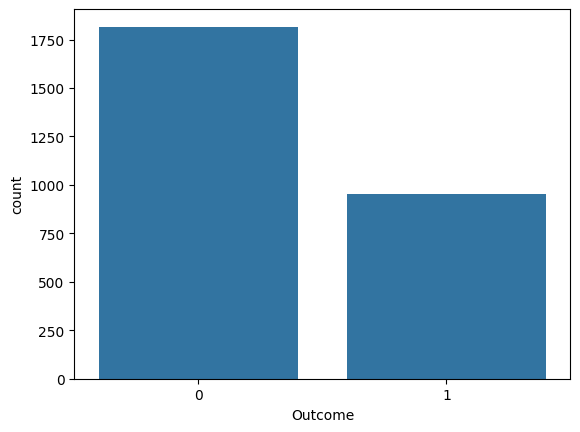

In [25]:
sns.countplot(x="Outcome", data=dataset)

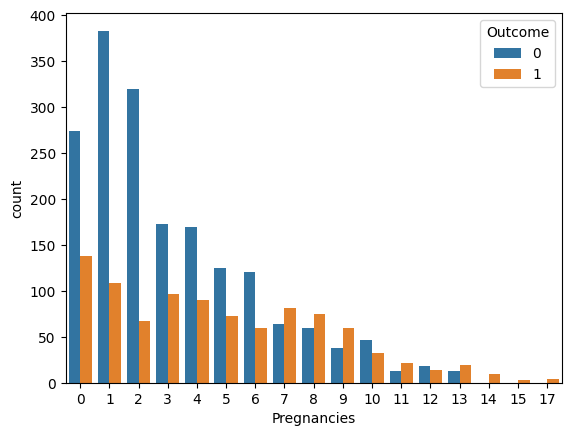

In [26]:
sns.countplot(x="Pregnancies", hue="Outcome", data=dataset)
plt.show()

In [27]:
# benign (B) values
(dataset.Outcome == 0).sum()

1816

In [28]:
# malignant (M) values
(dataset.Outcome == 1).sum()

952

## Correlation matrix and Heatmap

In [29]:
# create a dummy dataset

dataset_2 = dataset.drop(columns='Outcome')

<Axes: title={'center': 'Correlation with Outcome'}>

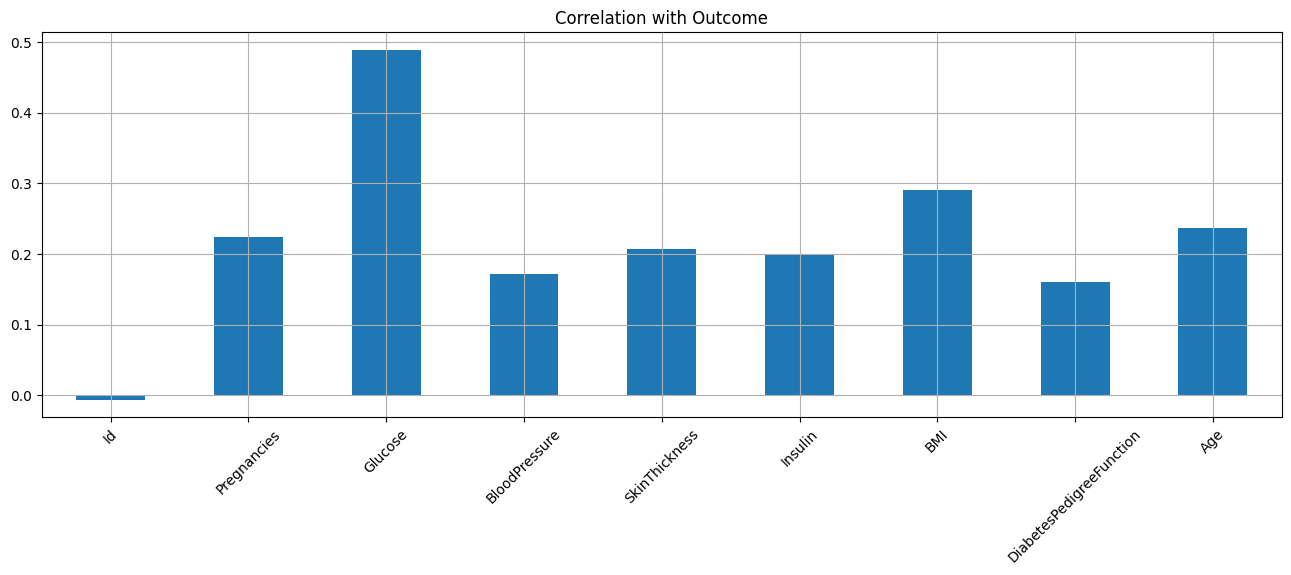

In [30]:
dataset_2.corrwith(dataset['Outcome']).plot.bar(
    figsize=(16,5), title = 'Correlation with Outcome', 
    rot = 45, grid = True
)

In [31]:
# Create Correlation Matrix
corr = dataset.corr()

<Axes: >

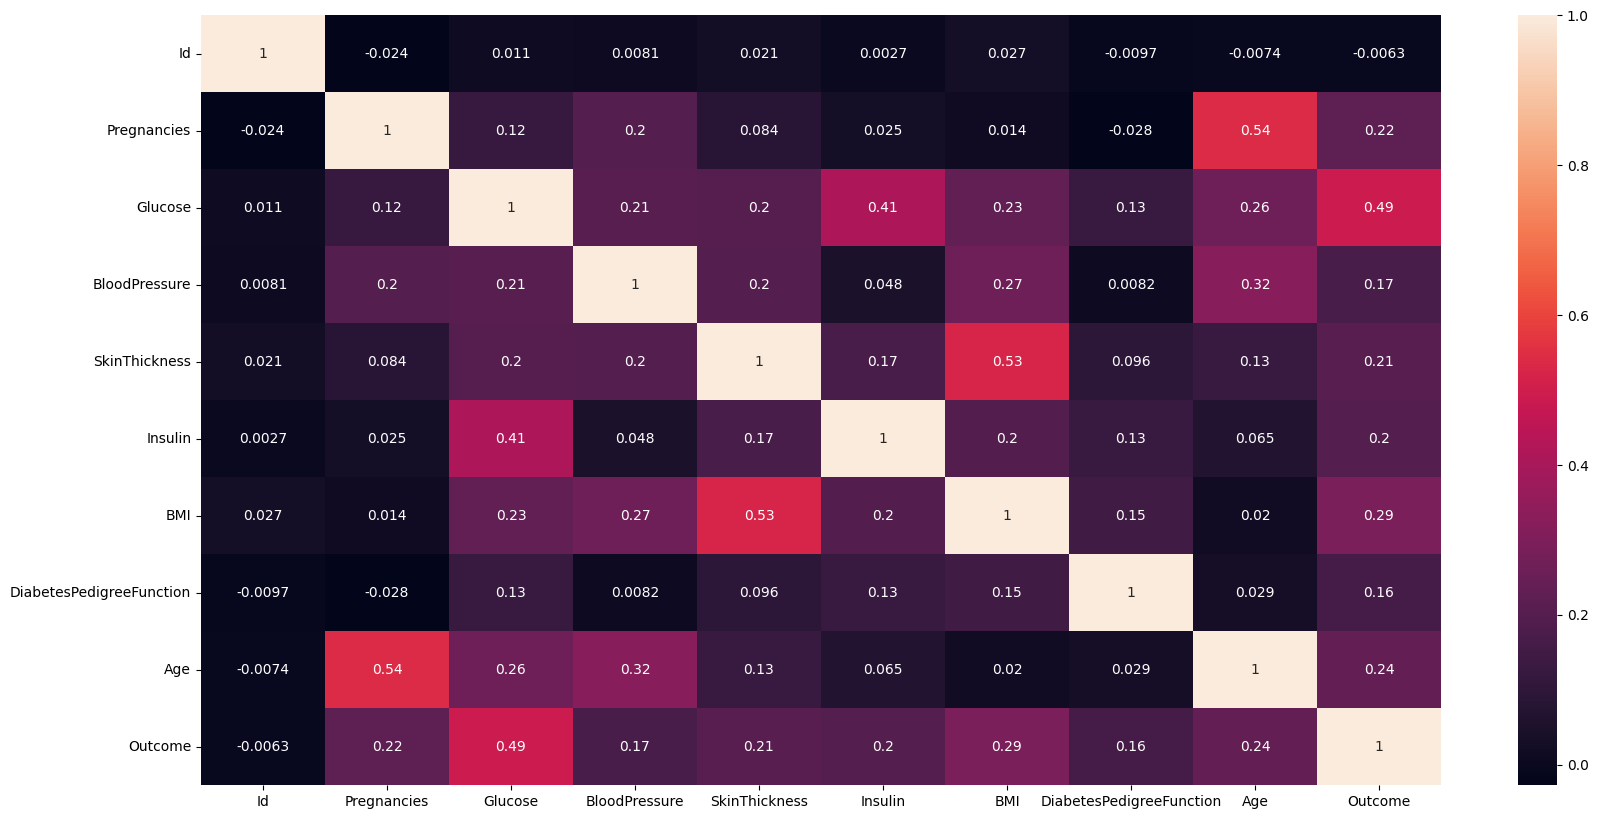

In [32]:
# Check the correlation between variables 

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [33]:
dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,2,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,3,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [34]:
# matrix of features / independent variables
x = dataset.iloc[:, 1:-1].values

In [35]:
x.shape

(2768, 8)

In [36]:
# dependent variable
y = dataset.iloc[:, -1].values

In [37]:
y.shape

(2768,)

In [38]:
# Split both into training and testing subset  (20% testing and your 80% will your training)
# set the random seed for reproducibility 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train = (features for training(80%))
# x_test = (features for testing (20%)))
# y_train = labels for training
# y_test = labels for testing




In [39]:
# For Training 

x_train.shape

(2214, 8)

In [40]:
# For Testing

x_test.shape

(554, 8)

In [41]:
y_train.shape

(2214,)

In [42]:
y_test.shape

(554,)

## Feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train

array([[ 0.06624022, -0.42183073, -0.69603387, ...,  0.31913913,
         1.31121966, -0.61604209],
       [-0.8371839 , -0.12747251, -1.19450353, ...,  0.10575861,
        -0.64738633, -0.86976266],
       [-0.53604253,  0.03605984, -2.02528632, ...,  1.35759101,
         0.1403139 , -0.61604209],
       ...,
       [ 0.36738159, -0.61806955,  2.95941037, ...,  0.94505533,
        -0.51356853,  2.68232527],
       [-0.8371839 , -0.81430837, -0.69603387, ..., -2.04227198,
        -0.53181641, -1.0389097 ],
       [ 0.96966434, -1.33761188,  0.46706203, ...,  2.01195794,
        -0.64738633,  0.73713426]])

In [45]:
x_test

array([[-0.23490115, -0.51995014, -1.52681665, ..., -0.23565023,
        -0.55310561, -0.78518914],
       [ 0.36738159,  0.55936336, -0.69603387, ..., -0.56283369,
        -0.19118928, -0.61604209],
       [ 1.57194709,  1.3770251 ,  0.9655317 , ..., -0.24987559,
         1.08616245, -0.10860096],
       ...,
       [-0.8371839 ,  1.34431863, -0.03140764, ...,  0.91660459,
         2.27531609, -0.02402744],
       [-0.53604253, -0.32371132, -0.36372075, ...,  0.21956155,
        -0.48315539, -0.61604209],
       [ 0.66852297, -0.16017897, -0.36372075, ...,  0.91660459,
         0.76986583,  0.65256074]])

In [46]:
print("Training rows:", x_train.shape[0])
print("Testing rows:", x_test.shape[0])

Training rows: 2214
Testing rows: 554


# Part 2: Building the model

## 1) Decision Tree

# Import and train the Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
classifier_dt = DecisionTreeClassifier(random_state=0)

# Train it
classifier_dt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

# Evaluate the model

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# after trained  model and predicted:
y_pred_dt = classifier_dt.predict(x_test)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("F1 Score:", f1_dt)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)

Decision Tree Results:
Accuracy: 0.9783393501805054
Precision: 0.972972972972973
Recall: 0.9625668449197861
F1 Score: 0.967741935483871
Confusion Matrix:
 [[362   5]
 [  7 180]]


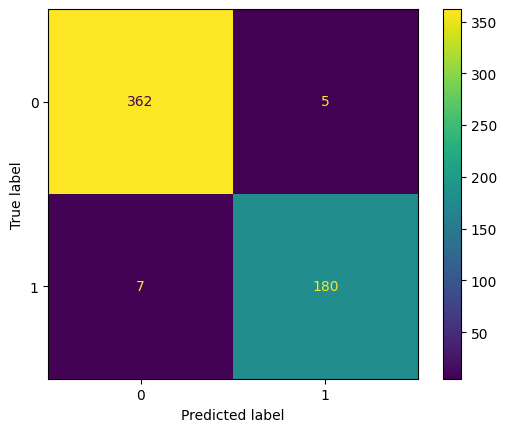

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_dt, x_test, y_test)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# assuming acc, prec, rec, and f1 have been calculated earlier
model_results = pd.DataFrame([['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

print(results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.978339   0.972973  0.962567  0.967742


C:\Users\HAILAN\AppData\Local\Temp\ipykernel_4072\1015205230.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)


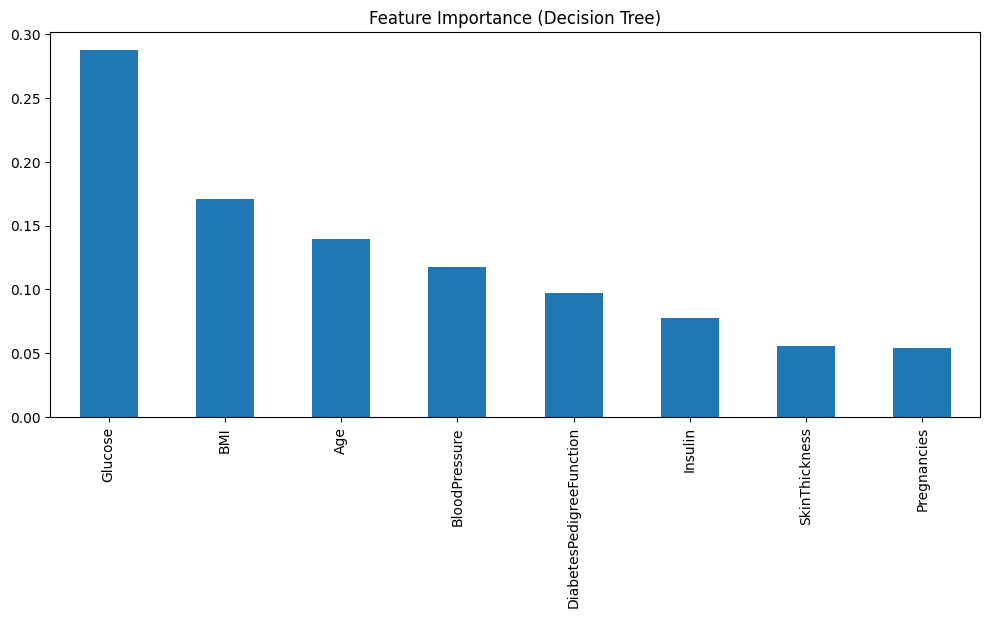

In [51]:
import pandas as pd
feat_importances = pd.Series(classifier_dt.feature_importances_, index=dataset.columns[1:-1])
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title="Feature Importance (Decision Tree)")
plt.show()

## 2) XGBoost

In [52]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
# after trained model and predicted:
y_pred = classifier_xgb.predict(x_test)

# calculate metrics
acc_xgb  = accuracy_score(y_test, y_pred)
prec_xgb = precision_score(y_test, y_pred)
rec_xgb  = recall_score(y_test, y_pred)
f1_xgb   = f1_score(y_test, y_pred)


In [54]:
# assuming acc, prec, rec, and f1 have been calculated earlier
model_results = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)
print(results)

cm = confusion_matrix(y_test, y_pred)
print(cm)

           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.978339   0.972973  0.962567  0.967742
1        XGBoost  0.981949   0.983607  0.962567  0.972973
[[364   3]
 [  7 180]]


## Confirm how many rows the model saw

In [55]:
classifier_xgb.fit(x_train, y_train)
print("Model trained on:", len(x_train), "rows")

Model trained on: 2214 rows


## Cross validation of Decision Tree

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

print("\n=== Decision Tree Cross-Validation ===")
accuracies_dt = cross_val_score(estimator=classifier_dt, X=x_train, y=y_train, cv=cv, scoring='accuracy')
print("Decision Tree Cross-validated Accuracy: {:.2f}%".format(accuracies_dt.mean() * 100))
print("Standard Deviation: {:.2f}%".format(accuracies_dt.std() * 100))

# ROC-AUC Cross-validation
roc_auc_dt = cross_val_score(estimator=classifier_dt, X=x_train, y=y_train, cv=cv, scoring='roc_auc')
print("ROC-AUC Mean: {:.3f}".format(roc_auc_dt.mean()))


=== Decision Tree Cross-Validation ===
Decision Tree Cross-validated Accuracy: 98.15%
Standard Deviation: 1.31%
ROC-AUC Mean: 0.980


## Cross validation of XGBoost

In [57]:

print("\n=== XGBoost Cross-Validation ===")
accuracies_xgb = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=cv, scoring='accuracy')
print("XGBoost Cross-validated Accuracy: {:.2f}%".format(accuracies_xgb.mean() * 100))
print("Standard Deviation: {:.2f}%".format(accuracies_xgb.std() * 100))

# ROC-AUC Cross-validation
roc_auc_xgb = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=cv, scoring='roc_auc')
print("ROC-AUC Mean: {:.3f}".format(roc_auc_xgb.mean()))


=== XGBoost Cross-Validation ===
XGBoost Cross-validated Accuracy: 98.56%
Standard Deviation: 1.33%
ROC-AUC Mean: 0.993


## Bar Plot: Cross-Validation Accuracy Comparison

C:\Users\HAILAN\AppData\Local\Temp\ipykernel_4072\1199559383.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Accuracy', data=cv_results, palette='viridis', edgecolor='black')


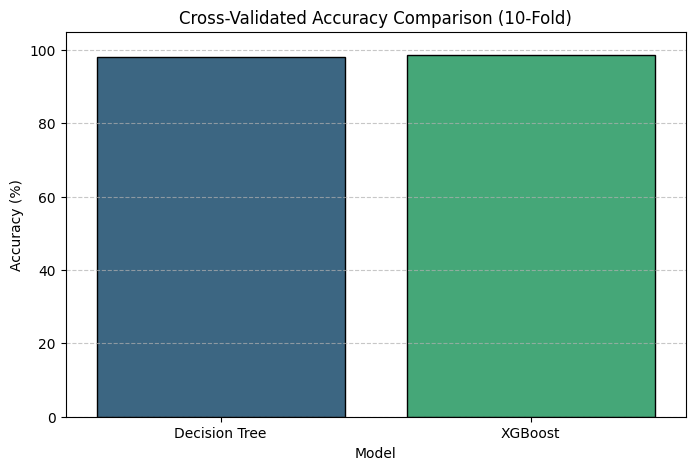

In [58]:
cv_results = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Mean Accuracy': [accuracies_dt.mean() * 100, accuracies_xgb.mean() * 100],
    'Std Dev': [accuracies_dt.std() * 100, accuracies_xgb.std() * 100]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Mean Accuracy', data=cv_results, palette='viridis', edgecolor='black')
plt.title('Cross-Validated Accuracy Comparison (10-Fold)')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ROC Curves for both models

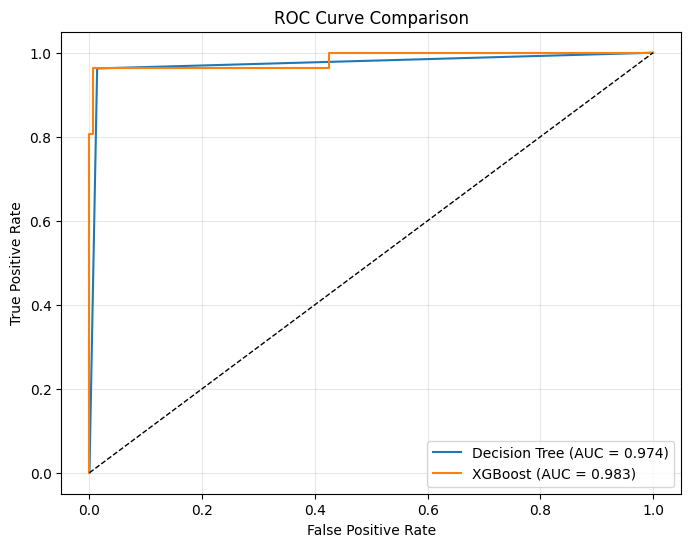

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

y_pred_proba_dt = classifier_dt.predict_proba(x_test)[:, 1]
y_pred_proba_xgb = classifier_xgb.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

roc_auc_dt_test = auc(fpr_dt, tpr_dt)
roc_auc_xgb_test = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt_test:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb_test:.3f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Feature Importance Visualization (Refined)

## Decision Tree Feature Importance

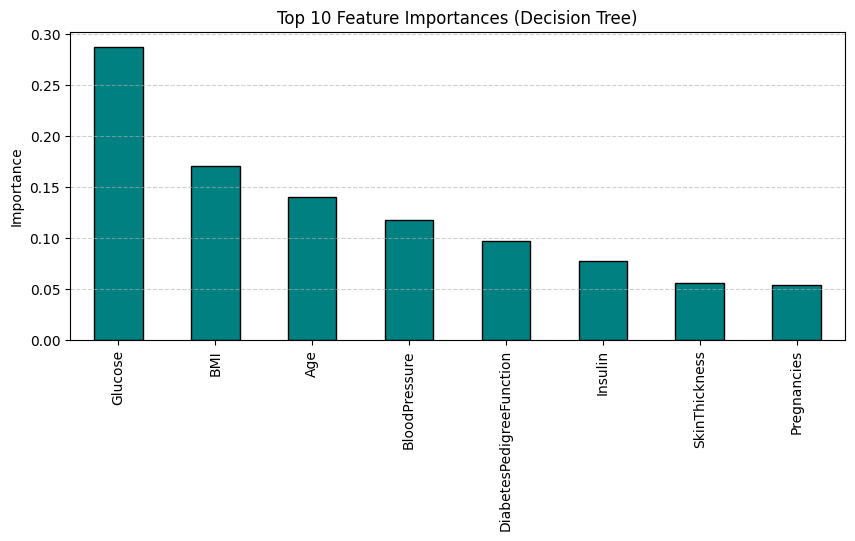

In [60]:
feat_importances_dt = pd.Series(classifier_dt.feature_importances_, index=dataset.columns[1:-1])
plt.figure(figsize=(10, 4))
feat_importances_dt.sort_values(ascending=False).head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.ylabel("Importance")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## XGBoost Feature Importance

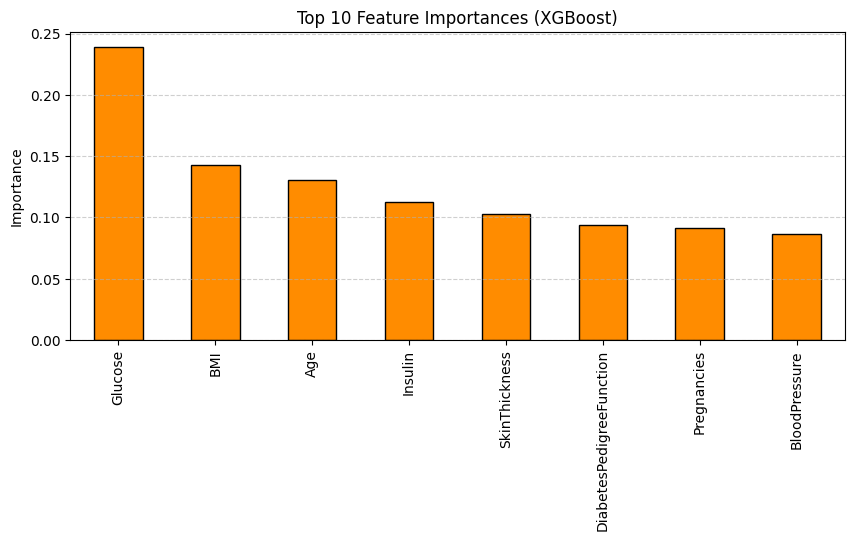

In [61]:
feat_importances_xgb = pd.Series(classifier_xgb.feature_importances_, index=dataset.columns[1:-1])
plt.figure(figsize=(10, 4))
feat_importances_xgb.sort_values(ascending=False).head(10).plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.ylabel("Importance")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()